## Donors Choose

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mp
import pandas as pd

project= pd.read_csv('train_data.csv')
print("The shape of project data is " , project.shape)
print("\n The columns of project data are", project.columns)
print(project['project_subject_categories'].head(4))
project.head(5)

The shape of project data is  (109248, 17)

 The columns of project data are Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved'],
      dtype='object')
0                    Literacy & Language
1      History & Civics, Health & Sports
2                        Health & Sports
3    Literacy & Language, Math & Science
Name: project_subject_categories, dtype: object


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,"Literacy & Language, Math & Science","Literacy, Mathematics",Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Math & Science,Mathematics,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1


In [2]:
resource= pd.read_csv('resources.csv')
print("The shape of resource data is " , resource.shape)
print("\n The columns of resource data are", resource.columns)
resource.head(3)

The shape of resource data is  (1541272, 4)

 The columns of resource data are Index(['id', 'description', 'quantity', 'price'], dtype='object')


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45


# Data analysis

Number of projects thar are approved for funding  92706 , ( 84.85830404217927 %)
Number of projects thar are not approved for funding  16542 , ( 15.141695957820739 %)


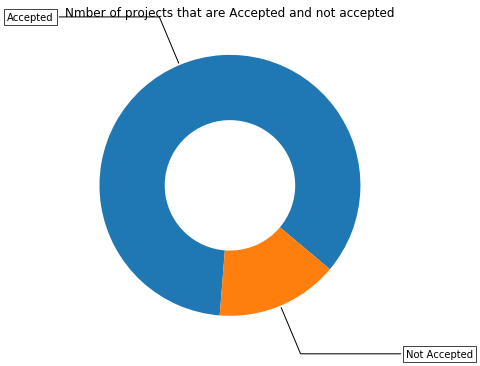

In [3]:
y_value_counts = project['project_is_approved'].value_counts()
print("Number of projects thar are approved for funding ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of projects thar are not approved for funding ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")


fig, ax = mp.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Accepted", "Not Accepted"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Nmber of projects that are Accepted and not accepted")

mp.show()

### 1.2.1 Univariate Analysis : school state

In [4]:
# Pandas dataframe groupby count, mean: https://stackoverflow.com/a/19385591/4084039

## grouping by state in ordet to obtain some counts and get means

temp = pd.DataFrame(project.groupby("school_state")["project_is_approved"].apply(np.mean)).reset_index()
# if you have data which contain only 0 and 1, then the mean = percentage (think about it)
temp.columns = ['state_code', 'num_proposals']
print(temp.head(5))
print('Shape of ',temp.shape)
print('\n*************************************************')


''' # How to plot US state heatmap: https://datascience.stackexchange.com/a/9620

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = temp['state_code'],
        z = temp['num_proposals'].astype(float),
        locationmode = 'USA-states',
        text = temp['state_code'],
        marker = dict(line = dict (color = 'rgb(255,255,255)',width = 2)),
        colorbar = dict(title = "% of pro")
    ) ]

layout = dict(
        title = 'Project Proposals % of Acceptance Rate by US States',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = mp.Figure(data=data, layout=layout)
offline.iplot(fig, filename='us-map-heat-map')
'''

  state_code  num_proposals
0         AK       0.840580
1         AL       0.854711
2         AR       0.831268
3         AZ       0.838379
4         CA       0.858136
Shape of  (51, 2)

*************************************************


' # How to plot US state heatmap: https://datascience.stackexchange.com/a/9620\n\nscl = [[0.0, \'rgb(242,240,247)\'],[0.2, \'rgb(218,218,235)\'],[0.4, \'rgb(188,189,220)\'],            [0.6, \'rgb(158,154,200)\'],[0.8, \'rgb(117,107,177)\'],[1.0, \'rgb(84,39,143)\']]\n\ndata = [ dict(\n        type=\'choropleth\',\n        colorscale = scl,\n        autocolorscale = False,\n        locations = temp[\'state_code\'],\n        z = temp[\'num_proposals\'].astype(float),\n        locationmode = \'USA-states\',\n        text = temp[\'state_code\'],\n        marker = dict(line = dict (color = \'rgb(255,255,255)\',width = 2)),\n        colorbar = dict(title = "% of pro")\n    ) ]\n\nlayout = dict(\n        title = \'Project Proposals % of Acceptance Rate by US States\',\n        geo = dict(\n            scope=\'usa\',\n            projection=dict( type=\'albers usa\' ),\n            showlakes = True,\n            lakecolor = \'rgb(255, 255, 255)\',\n        ),\n    )\n\nfig = mp.Figure(data=da

In [5]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='project_is_approved', col3='total'):
    ind = np.arange(data.shape[0])
    
    mp.figure(figsize=(20,5))
    p1 = mp.bar(ind, data[col3].values)
    p2 = mp.bar(ind, data[col2].values)

    mp.ylabel('Projects')
    mp.title('Number of projects aproved vs rejected')
    mp.xticks(ind, list(data[xtick].values))
    mp.legend((p1[0], p2[0]), ('total', 'accepted'))
    mp.show()

In [6]:
def univariate_barplots(data, col1, col2='project_is_approved', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(project.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(project.groupby(col1)[col2].agg({'total':'count'})).reset_index()['total']
    temp['Avg'] = pd.DataFrame(project.groupby(col1)[col2].agg({'Avg':'mean'})).reset_index()['Avg']
    
    temp.sort_values(by=['total'], inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

G:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  
G:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  import sys


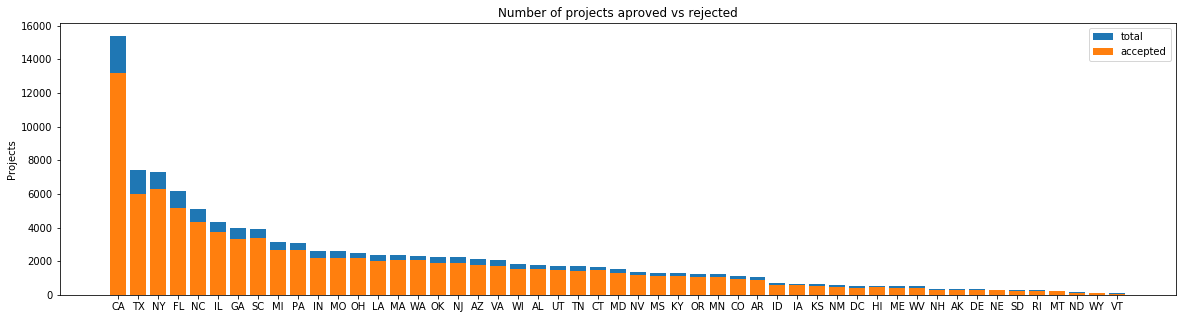

   school_state  project_is_approved  total       Avg
4            CA                13205  15388  0.858136
43           TX                 6014   7396  0.813142
34           NY                 6291   7318  0.859661
9            FL                 5144   6185  0.831690
27           NC                 4353   5091  0.855038
   school_state  project_is_approved  total       Avg
39           RI                  243    285  0.852632
26           MT                  200    245  0.816327
28           ND                  127    143  0.888112
50           WY                   82     98  0.836735
46           VT                   64     80  0.800000


In [7]:
univariate_barplots(project, 'school_state', 'project_is_approved', False)

#### Summary:
1. Every state has greater than 80% success rate
2. California is the state with maximum project proposals and also the state with maximum projects approved.
3. The minimum project approved number is for VT Vermont.

### 1.2.2 Univariate Analysis: teacher_prefix

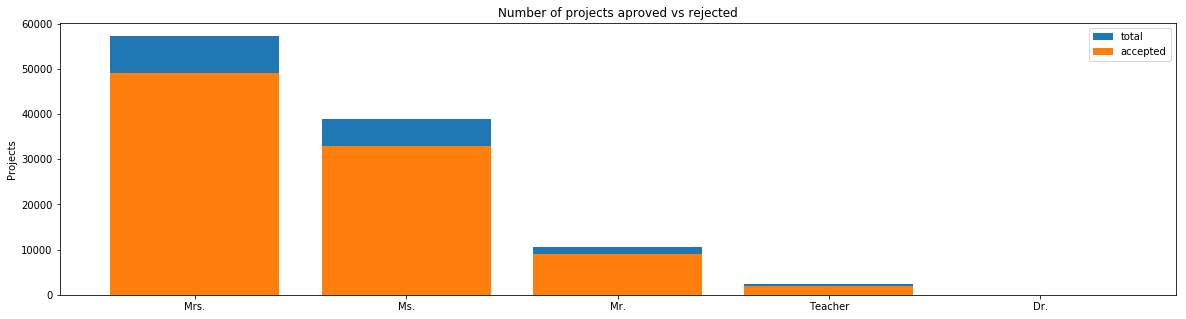

  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308
  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308


In [8]:
import warnings 
warnings.filterwarnings('ignore')

univariate_barplots(project , 'teacher_prefix', 'project_is_approved' , top=False)

#### Summary:
1. Every one has greater than 69 % success rate
2. "Mrs." is the teacher prefix with maximum project proposals and also maximum projects approved.
3. The %age of projects approval is almost same of "Ms." & "Mr."
4. "Teacher" & "Dr." have the least of %age approved projects.

### 1.2.3 Univariate Analysis: project_grade_category

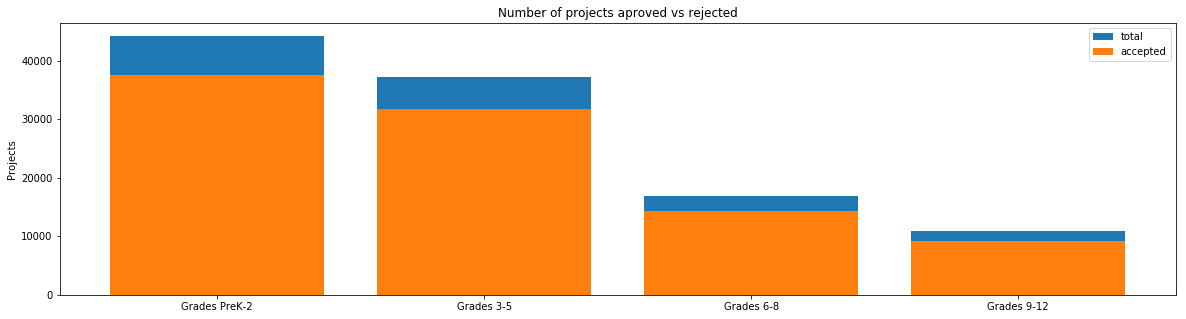

  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636
  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636


In [9]:
univariate_barplots(project, 'project_grade_category', 'project_is_approved' , top=False)

#### Summary:
1. Every grade has greater than 83 % success rate
2. "PreK-2" is the project grade category with maximum project proposals and also maximum projects approved, although %age wise    " Grades 3-5" have the maximum approval percentage(even though its just slightly better) 
3. The %age of projects approval is almost same of "PreK-2" & "6-8"

### 1.2.4 Univariate Analysis: project_subject_categories

In [10]:
categories = list(project['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in categories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())

In [11]:
project['clean_categories'] = cat_list
project.drop(['project_subject_categories'], axis=1, inplace=True)
project.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports


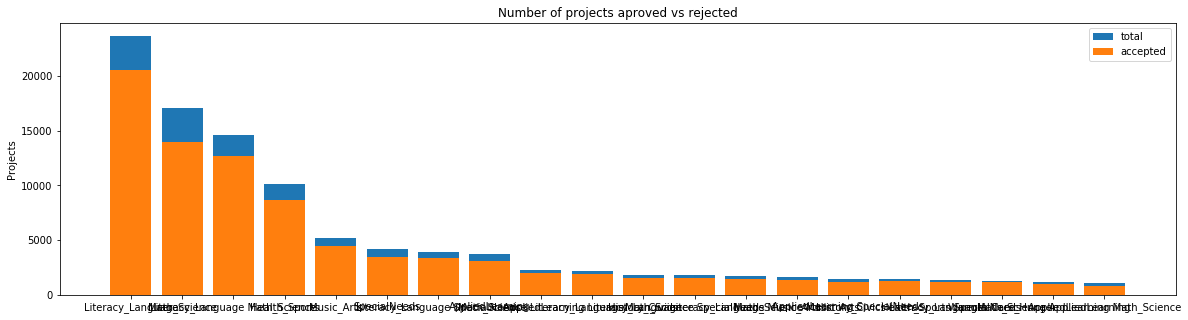

                  clean_categories  project_is_approved  total       Avg
24               Literacy_Language                20520  23655  0.867470
32                    Math_Science                13991  17072  0.819529
28  Literacy_Language Math_Science                12725  14636  0.869432
8                    Health_Sports                 8640  10177  0.848973
40                      Music_Arts                 4429   5180  0.855019
                    clean_categories  project_is_approved  total       Avg
19  History_Civics Literacy_Language                 1271   1421  0.894441
14        Health_Sports SpecialNeeds                 1215   1391  0.873472
50                Warmth Care_Hunger                 1212   1309  0.925898
33      Math_Science AppliedLearning                 1019   1220  0.835246
4       AppliedLearning Math_Science                  855   1052  0.812738


In [12]:
univariate_barplots(project, 'clean_categories', 'project_is_approved', top=20)

#### Summary:
1. Every grade has greater than 81 % success rate
2. "Literacy_Language" is the subject category with maximum project proposals and also maximum projects approved.
3. The %age of projects approval for "Math_Science" is 81.2 while that of "Math_Science and Literacy_Language" is 86.9%


In [13]:
# count of all the words for "clean_categories" in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project['clean_categories'].values:
    my_counter.update(word.split())
my_counter

Counter({'Literacy_Language': 52239,
         'History_Civics': 5914,
         'Health_Sports': 14223,
         'Math_Science': 41421,
         'SpecialNeeds': 13642,
         'AppliedLearning': 12135,
         'Music_Arts': 10293,
         'Warmth': 1388,
         'Care_Hunger': 1388})

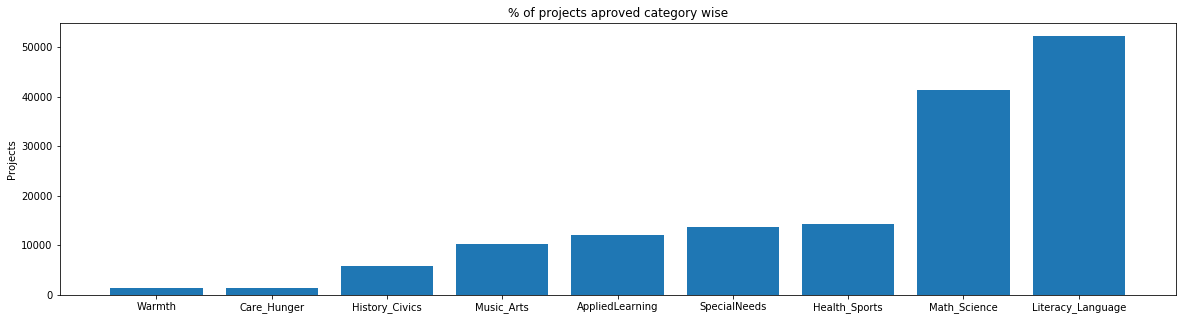

In [14]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_cat_dict))
mp.figure(figsize=(20,5))
p1 = mp.bar(ind, list(sorted_cat_dict.values()))

mp.ylabel('Projects')
mp.title('% of projects aproved category wise')
mp.xticks(ind, list(sorted_cat_dict.keys()))
mp.show()

### Summary:
1. Literacy_Language has the maximum success rate.

In [15]:
for i, j in sorted_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Warmth               :      1388
Care_Hunger          :      1388
History_Civics       :      5914
Music_Arts           :     10293
AppliedLearning      :     12135
SpecialNeeds         :     13642
Health_Sports        :     14223
Math_Science         :     41421
Literacy_Language    :     52239


### 1.2.5 Univariate Analysis: project_subject_subcategories

In [16]:
sub_categories = list(project['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_categories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

In [17]:
## dropping the subcategories

project['clean_subcategories'] = sub_cat_list
project.drop(['project_subject_subcategories'], axis=1, inplace=True)
project.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports


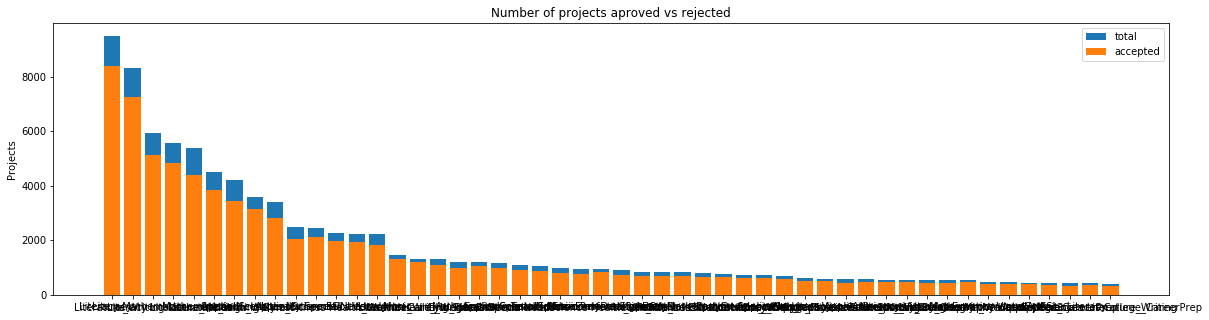

                clean_subcategories  project_is_approved  total       Avg
317                        Literacy                 8371   9486  0.882458
319            Literacy Mathematics                 7260   8325  0.872072
331  Literature_Writing Mathematics                 5140   5923  0.867803
318     Literacy Literature_Writing                 4823   5571  0.865733
342                     Mathematics                 4385   5379  0.815207
                    clean_subcategories  project_is_approved  total       Avg
196       EnvironmentalScience Literacy                  389    444  0.876126
127                                 ESL                  349    421  0.828979
79                   College_CareerPrep                  343    421  0.814727
17   AppliedSciences Literature_Writing                  361    420  0.859524
3    AppliedSciences College_CareerPrep                  330    405  0.814815


In [18]:
univariate_barplots(project, 'clean_subcategories', 'project_is_approved', top=50)

### Summary:
1. Literacy subcategory has the maximum success rate.
2. Mathematics has a approval rate of 81.5 %, but when coupled with sub-categories like Literacy and Literature_writing it has
a approval %age of 87.2% and 86.78%.

In [19]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project['clean_subcategories'].values:
    my_counter.update(word.split())

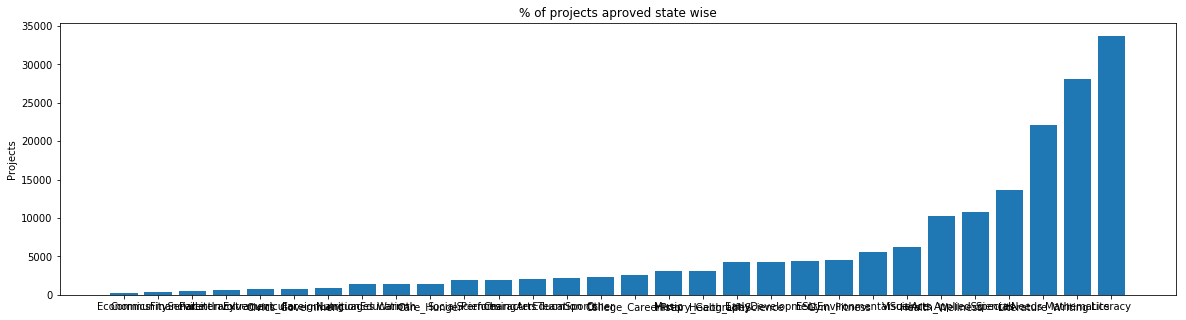

In [20]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_sub_cat_dict))
mp.figure(figsize=(20,5))
p1 = mp.bar(ind, list(sorted_sub_cat_dict.values()))

mp.ylabel('Projects')
mp.title('% of projects aproved state wise')
mp.xticks(ind, list(sorted_sub_cat_dict.keys()))
mp.show()

In [21]:
for i, j in sorted_sub_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Economics            :       269
CommunityService     :       441
FinancialLiteracy    :       568
ParentInvolvement    :       677
Extracurricular      :       810
Civics_Government    :       815
ForeignLanguages     :       890
NutritionEducation   :      1355
Warmth               :      1388
Care_Hunger          :      1388
SocialSciences       :      1920
PerformingArts       :      1961
CharacterEducation   :      2065
TeamSports           :      2192
Other                :      2372
College_CareerPrep   :      2568
Music                :      3145
History_Geography    :      3171
Health_LifeScience   :      4235
EarlyDevelopment     :      4254
ESL                  :      4367
Gym_Fitness          :      4509
EnvironmentalScience :      5591
VisualArts           :      6278
Health_Wellness      :     10234
AppliedSciences      :     10816
SpecialNeeds         :     13642
Literature_Writing   :     22179
Mathematics          :     28074
Literacy             :     33700


### Summary:
1. People like to donate more when it comes to Literacy and less when there's economics.

### 1.2.6 Univariate Analysis: project_title (Text features (Title))

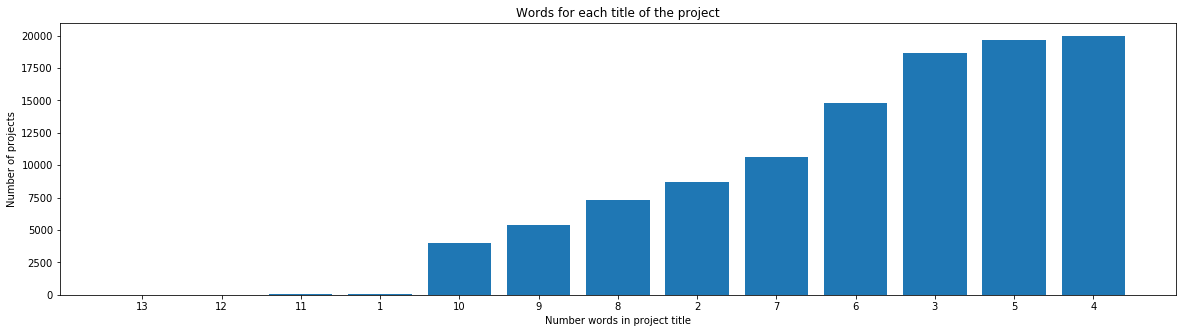

In [22]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = project['project_title'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
mp.figure(figsize=(20,5))
p1 = mp.bar(ind, list(word_dict.values()))

mp.ylabel('Number of projects')
mp.xlabel('Number words in project title')
mp.title('Words for each title of the project')
mp.xticks(ind, list(word_dict.keys()))
mp.show()

### Summary:
1. There are more number of projects with 4 to 5 words in project title than other number of words.
2. people may tend to keep the project title short and crisp and not too long for the sake of avoiding ambiguity and vagueness.

In [23]:
approved_title_word_count = project[project['project_is_approved']==1]['project_title'].str.split().apply(len)
approved_title_word_count = approved_title_word_count.values

print(approved_title_word_count)

rejected_title_word_count = project[project['project_is_approved']==0]['project_title'].str.split().apply(len)
rejected_title_word_count = rejected_title_word_count.values

print(rejected_title_word_count)

[5 2 3 ... 6 5 7]
[7 7 4 ... 3 6 3]


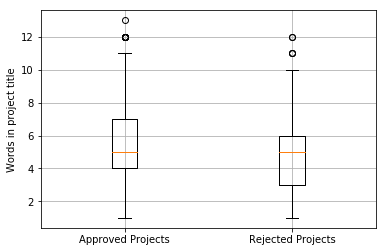

In [24]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
mp.boxplot([approved_title_word_count, rejected_title_word_count])
mp.xticks([1,2],('Approved Projects','Rejected Projects'))
mp.ylabel('Words in project title')
mp.grid()
mp.show()

### Summary
1. The 50th percentile for both approved as well as rejected projects is just the same.
2. However 75th & 25th percentile for approved projects is more than Rejected projects which implies approved projects
tend to have slighlty more number of words than the one rejected.


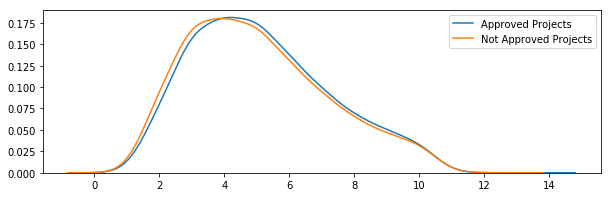

In [25]:
mp.figure(figsize=(10,3))
sns.kdeplot(approved_title_word_count,label="Approved Projects", bw=0.6)
sns.kdeplot(rejected_title_word_count,label="Not Approved Projects", bw=0.6)
mp.legend()
mp.show()

### Summary 
1. the pdf for approved projects is ahead to Rejected projects which implies approved projects tend to have slighlty more number of words than the one rejected.

### 1.2.7 Univariate Analysis: Text features (Project Essay's)

In [26]:
# merge two column text dataframe: 

project["essay"] = project["project_essay_1"].map(str) +\
                        project["project_essay_2"].map(str) + \
                        project["project_essay_3"].map(str) + \
                        project["project_essay_4"].map(str)

In [27]:
approved_word_count = project[project['project_is_approved']==1]['essay'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project[project['project_is_approved']==0]['essay'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

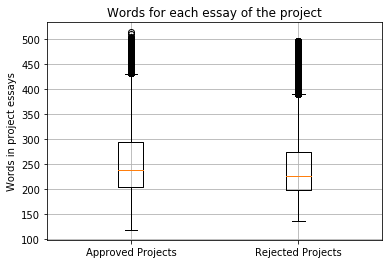

In [28]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
mp.boxplot([approved_word_count, rejected_word_count])
mp.title('Words for each essay of the project')
mp.xticks([1,2],('Approved Projects','Rejected Projects'))
mp.ylabel('Words in project essays')
mp.grid()
mp.show()

### Summary
1. It seems as approved projects have more words in project essays than rejected projects.

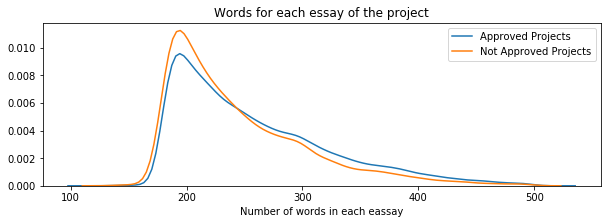

In [29]:
mp.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")

mp.title('Words for each essay of the project')
mp.xlabel('Number of words in each eassay')
mp.legend()
mp.show()

### Summary
1. It seems as approved projects have more words in project essays than rejected projects.

### 1.2.8 Univariate Analysis: Cost per project

In [30]:
# we get the cost of the project using resource.csv file
resource.head(2)

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [31]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price= resource.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price.head(2)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21


In [32]:
# join two dataframes in python: 
project = pd.merge(project, price, on='id', how='left')
project

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,quantity
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...,154.60,23
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...,299.00,1
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0,Health_Sports,Health_Wellness TeamSports,"\r\n\""True champions aren't always the ones th...",516.85,22
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1,Literacy_Language Math_Science,Literacy Mathematics,I work at a unique school filled with both ESL...,232.90,4
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1,Math_Science,Mathematics,Our second grade classroom next year will be m...,67.98,4
5,141660,p154343,a50a390e8327a95b77b9e495b58b9a6e,Mrs.,FL,2017-04-08 22:40:43,Grades 3-5,Flexible Seating for Mrs. Jarvis' Terrific Thi...,I will be moving from 2nd grade to 3rd grade a...,These flexible seating options will allow my s...,NaN,NaN,My students need movement to be successful. Be...,1,1,Literacy_Language SpecialNeeds,Literature_Writing SpecialNeeds,I will be moving from 2nd grade to 3rd grade a...,113.22,11
6,21147,p099819,9b40170bfa65e399981717ee8731efc3,Mrs.,CT,2017-02-17 19:58:56,Grades 6-8,Chromebooks for Special Education Reading Program,My students are a dynamic and very energetic g...,My students are an engaging and active group o...,NaN,NaN,My students need some dependable laptops for d...,1,1,Literacy_Language SpecialNeeds,Literacy SpecialNeeds,My students are a dynamic and very energetic g...,159.99,3
7,94142,p092424,5bfd3d12fae3d2fe88684bbac570c9d2,Ms.,GA,2016-09-01 00:02:15,Grades 3-5,It's the 21st Century,Not only do our students struggle with poverty...,"My students need 4 iPads, the latest technolog...",NaN,NaN,My students need ipads to help them access a w...,7,1,Math_Science,Mathematics,Not only do our students struggle with poverty...,229.00,4
8,112489,p045029,487448f5226005d08d36bdd75f095b31,Mrs.,SC,2016-09-25 17:00:26,Grades PreK-2,Targeting More Success in Class,My students are enthusiastic and inquisitive l...,My second graders need extra activity time dur...,NaN,NaN,My students need three devices and three manag...,28,1,Health_Sports,Health_Wellness,My students are enthusiastic and inquisitive l...,241.98,6
9,158561,p001713,140eeac1885c820ad5592a409a3a8994,Ms.,NC,2016-11-17 18:18:56,Grades PreK-2,Just For the Love of Reading--\r\nPure Pleasure,Over 9

In [33]:
approved_price = project[project['project_is_approved']==1]['price'].values

rejected_price = project[project['project_is_approved']==0]['price'].values

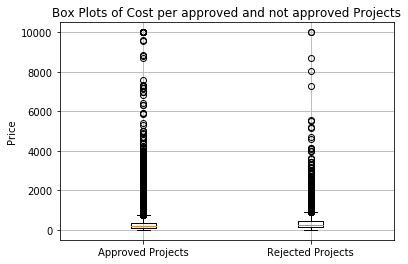

In [34]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
mp.boxplot([approved_price, rejected_price])
mp.title('Box Plots of Cost per approved and not approved Projects')
mp.xticks([1,2],('Approved Projects','Rejected Projects'))
mp.ylabel('Price')
mp.grid()
mp.show()

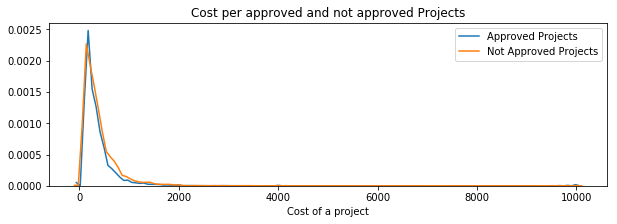

In [35]:
mp.figure(figsize=(10,3))
sns.distplot(approved_price, hist=False, label="Approved Projects")
sns.distplot(rejected_price, hist=False, label="Not Approved Projects")
mp.title('Cost per approved and not approved Projects')
mp.xlabel('Cost of a project')
mp.legend()
mp.show()

### Summary:

1. Here we can see than the plots are almost overlapping.
2. Also we can see that the cost of not-approved projects happens to be more than the approved projects.

In [36]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_price,i), 3), np.round(np.percentile(rejected_price,i), 3)])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.66       |          1.97         |
|     5      |       13.59       |          41.9         |
|     10     |       33.88       |         73.67         |
|     15     |        58.0       |         99.109        |
|     20     |       77.38       |         118.56        |
|     25     |       99.95       |        140.892        |
|     30     |       116.68      |         162.23        |
|     35     |      137.232      |        184.014        |
|     40     |       157.0       |        208.632        |
|     45     |      178.265      |        235.106        |
|     50     |       198.99      |        263.145        |
|     55     |       223.99      |         292.61        |
|     60     |       255.63      |        325.144        |
|     65     |      285.412      |         362.39       

### Summary:

1. Here we can see that 50th percentile price of approved projects are 198.99 and whereas not-approved projects is 263.145 dollars, 75th percentile for approved is 366.075 and not-approved is 449.945 dollars, the price of not-approved projects is more than approves ones.

<h3><font color='red'>1.2.9 Univariate Analysis: teacher_number_of_previously_posted_projects</font></h3>

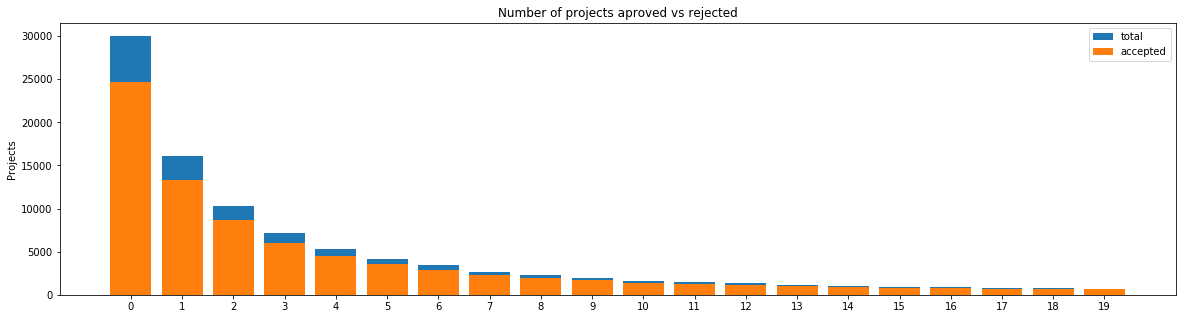

   teacher_number_of_previously_posted_projects  project_is_approved  total  \
0                                             0                24652  30014   
1                                             1                13329  16058   
2                                             2                 8705  10350   
3                                             3                 5997   7110   
4                                             4                 4452   5266   

        Avg  
0  0.821350  
1  0.830054  
2  0.841063  
3  0.843460  
4  0.845423  
    teacher_number_of_previously_posted_projects  project_is_approved  total  \
15                                            15                  818    942   
16                                            16                  769    894   
17                                            17                  712    803   
18                                            18                  666    772   
19                                       

In [37]:
univariate_barplots(project, 'teacher_number_of_previously_posted_projects', 'project_is_approved', 20)

## Summary:
1. There are 30014 teachers who are submitting the project proposal for the first time, & their approval %age stands at 82.13%.
2. As number of previously posted projects increase, the number of projects submitted goes on decreasing albeit their approval % age goes on increasing.
3. The minimum approval %age of a project proposal is 82%.

<h3><font color='red'>1.2.10 Univariate Analysis: project_resource_summary</font></h3>

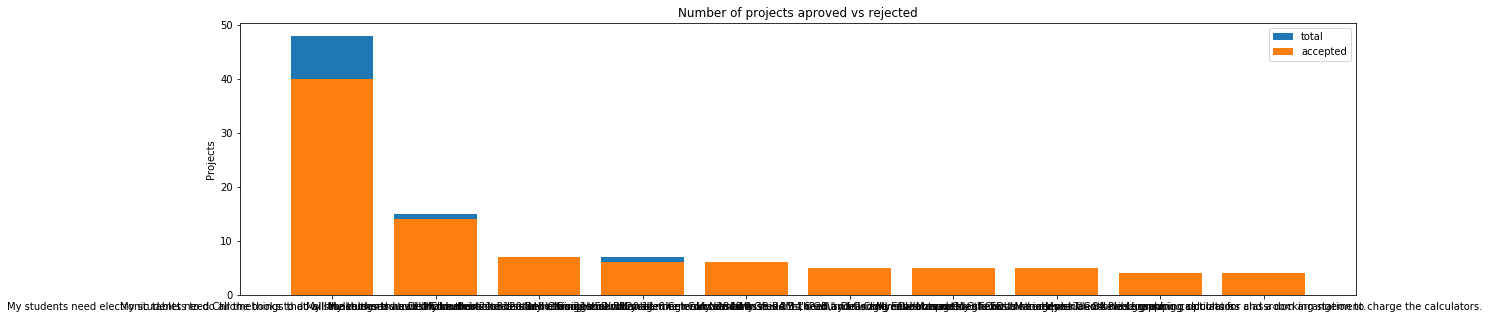

                                project_resource_summary  project_is_approved  \
56539  My students need electronic tablets to do all ...                   40   
10193  My students need Chromebooks to do all the thi...                   14   
18828  My students need a Dell Chromebook 3120 and a ...                    7   
51417  My students need chromebooks to do all the thi...                    6   
18819  My students need a Dell Chromebook 3120 11 6 C...                    6   

       total       Avg  
56539     48  0.833333  
10193     15  0.933333  
18828      7  1.000000  
51417      7  0.857143  
18819      6  1.000000  
                                project_resource_summary  project_is_approved  \
3786   My students need 3 \"iPad\" minis and cases to...                    5   
18830  My students need a Dell Chromebook and Google ...                    5   
3774   My students need 3 Texas Instruments TI - 84 P...                    5   
82608  My students need quick and flexi

In [38]:
univariate_barplots(project, 'project_resource_summary', 'project_is_approved', 10)

### Summary:

1. Not much is clear from the above plot, lets see if the numbers that are present in the resource summary have any impact on the approval of the project proposal.

In [39]:
proj_resource_summ= list(project['project_resource_summary'])
proj_resource_summ[3]   ## randomly printing a summary at index 3

'My students need to engage in Reading and Math in a way that will inspire them with these Mini iPads!'

In [40]:
## https://stackoverflow.com/questions/24878174/how-to-count-digits-letters-spaces-for-a-string-in-python

'''

import re

words= 0
numbers = 0  # initiating the count of numbers to 0
numbers_present=[]

for i in proj_resource_summ:
    for x in i.split():
        if x.isdigit():     
            numbers +=1
            numbers_present.append(int(1))
            break
    
    for x in i.split():
        if x.isalpha():
            words+=1
            numbers_present.append(int(0))
              
print(numbers)
print(words)
print("Number of summaries having digits in them :",numbers)
print('% age of summaries having digits in them', (numbers/109248)*100)
numbers_present[:20]

'''

'\n\nimport re\n\nwords= 0\nnumbers = 0  # initiating the count of numbers to 0\nnumbers_present=[]\n\nfor i in proj_resource_summ:\n    for x in i.split():\n        if x.isdigit():     \n            numbers +=1\n            numbers_present.append(int(1))\n            break\n    \n    for x in i.split():\n        if x.isalpha():\n            words+=1\n            numbers_present.append(int(0))\n              \nprint(numbers)\nprint(words)\nprint("Number of summaries having digits in them :",numbers)\nprint(\'% age of summaries having digits in them\', (numbers/109248)*100)\nnumbers_present[:20]\n\n'

In [41]:
## https://stackoverflow.com/questions/19859282/check-if-a-string-contains-a-number

def numbers_are_present(i):
    if any(x.isdigit() for x in i):
        return 1
    
    else:
        return 0
        

numbers_list=list(map(numbers_are_present, project['project_resource_summary']))
print(numbers_list[:20])
project['numbers_present_summary'] = numbers_list

project.head(2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1]


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,...,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,quantity,numbers_present_summary
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",...,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...,154.6,23,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,...,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...,299.0,1,0


In [42]:
numbers_present_count= project['numbers_present_summary'].value_counts()

print(numbers_present_count[1])
print("%age of summaries which have numbers in them ",  (numbers_present_count[1]/(numbers_present_count[1]+numbers_present_count[0]))*100)


15756
%age of summaries which have numbers in them  14.422231985940245


### Summary:

1. Of all, 15756 summaries have digits in them which makes roughly 14.422%

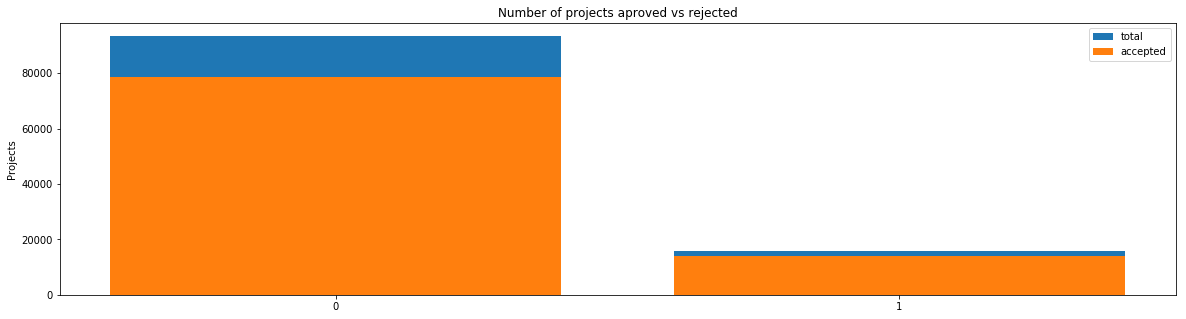

   numbers_present_summary  project_is_approved  total       Avg
0                        0                78616  93492  0.840885
1                        1                14090  15756  0.894263
   numbers_present_summary  project_is_approved  total       Avg
0                        0                78616  93492  0.840885
1                        1                14090  15756  0.894263


In [43]:
univariate_barplots(project, 'numbers_present_summary', 'project_is_approved', 10)

### Summary:

1. Of all summaries, 93942 summaries do not have numbers in them, out which 78616 are approved which makes 84.08% of it.
2. 15756 summaried have numbers in them, out which 14090 are approved which makes 89.42% of it.

## 1.3 Text preprocessing

### 1.3.1 Essay Text

In [44]:
project.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,...,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,quantity,numbers_present_summary
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",...,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...,154.6,23,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,...,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...,299.0,1,0


In [45]:
# printing some random essays.
print(project['essay'].values[0])
print("="*100)
print(project['essay'].values[150])
print("="*100)
print(project['essay'].values[1000])
print("="*100)
print(project['essay'].values[20000])
print("="*100)
print(project['essay'].values[99999])
print("="*100)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [46]:
# https://stackoverflow.com/a/47091490/4084039

import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [47]:
sent = decontracted(project['essay'].values[99999])
print(sent)
print("="*130)

The mediocre teacher tells. The good teacher explains. The superior teacher demonstrates. The great teacher inspires. -William A. Ward\r\n\r\nMy school has 803 students which is makeup is 97.6% African-American, making up the largest segment of the student body. A typical school in Dallas is made up of 23.2% African-American students. Most of the students are on free or reduced lunch. We are not receiving doctors, lawyers, or engineers children from rich backgrounds or neighborhoods. As an educator I am inspiring minds of young children and we focus not only on academics but one smart, effective, efficient, and disciplined students with good character.In our classroom we can utilize the Bluetooth for swift transitions during class. I use a speaker which does not amplify the sound enough to receive the message. Due to the volume of my speaker my students can not hear videos or books clearly and it is not making the lessons as meaningful. But with the bluetooth speaker my students will b

In [48]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

The mediocre teacher tells. The good teacher explains. The superior teacher demonstrates. The great teacher inspires. -William A. Ward    My school has 803 students which is makeup is 97.6% African-American, making up the largest segment of the student body. A typical school in Dallas is made up of 23.2% African-American students. Most of the students are on free or reduced lunch. We are not receiving doctors, lawyers, or engineers children from rich backgrounds or neighborhoods. As an educator I am inspiring minds of young children and we focus not only on academics but one smart, effective, efficient, and disciplined students with good character.In our classroom we can utilize the Bluetooth for swift transitions during class. I use a speaker which does not amplify the sound enough to receive the message. Due to the volume of my speaker my students can not hear videos or books clearly and it is not making the lessons as meaningful. But with the bluetooth speaker my students will be ab

In [49]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

The mediocre teacher tells The good teacher explains The superior teacher demonstrates The great teacher inspires William A Ward My school has 803 students which is makeup is 97 6 African American making up the largest segment of the student body A typical school in Dallas is made up of 23 2 African American students Most of the students are on free or reduced lunch We are not receiving doctors lawyers or engineers children from rich backgrounds or neighborhoods As an educator I am inspiring minds of young children and we focus not only on academics but one smart effective efficient and disciplined students with good character In our classroom we can utilize the Bluetooth for swift transitions during class I use a speaker which does not amplify the sound enough to receive the message Due to the volume of my speaker my students can not hear videos or books clearly and it is not making the lessons as meaningful But with the bluetooth speaker my students will be able to hear and I can sto

In [50]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [51]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentence in tqdm(project['essay'].values):
    sent = decontracted(sentence)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [01:16<00:00, 1419.19it/s]


In [52]:
# after preprocesing
preprocessed_essays[99999]

'the mediocre teacher tells the good teacher explains the superior teacher demonstrates the great teacher inspires william a ward my school 803 students makeup 97 6 african american making largest segment student body a typical school dallas made 23 2 african american students most students free reduced lunch we not receiving doctors lawyers engineers children rich backgrounds neighborhoods as educator i inspiring minds young children focus not academics one smart effective efficient disciplined students good character in classroom utilize bluetooth swift transitions class i use speaker not amplify sound enough receive message due volume speaker students not hear videos books clearly not making lessons meaningful but bluetooth speaker students able hear i stop pause replay time the cart allow room storage things needed day extra part i use the table top chart letter words pictures students learn different letters accessible nannan'

<h2><font color='red'>1.3.2 Project title Text</font></h2>


In [53]:
# printing some random project titles.

print(project['project_title'].values[0])
print("="*50)
print(project['project_title'].values[150])
print("="*50)
print(project['project_title'].values[1000])
print("="*50)
print(project['project_title'].values[20000])
print("="*50)
print(project['project_title'].values[99999])
print("="*50)


Educational Support for English Learners at Home
More Movement with Hokki Stools
Sailing Into a Super 4th Grade Year
We Need To Move It While We Input It!
Inspiring Minds by Enhancing the Educational Experience


In [54]:
# Combining all the above statements 

from tqdm import tqdm
preprocessed_project_titles = []
# tqdm is for printing the status bar

for title in tqdm(project['project_title'].values):
    titles = decontracted(title)                    ## decontracting the sentence
    titles = titles.replace('\\r', ' ')             ## removing \r
    titles = titles.replace('\\"', ' ')             
    titles = titles.replace('\\n', ' ')             ## removing \n
    titles = re.sub('[^A-Za-z0-9]+', ' ', titles)     ## removing special characters
    # https://gist.github.com/sebleier/554280
    titles = ' '.join(e for e in titles.split() if e not in stopwords)
    preprocessed_project_titles.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:58<00:00, 1854.42it/s]


In [55]:
preprocessed_project_titles[99999]

'when last time used math probably within last hour yet go school believing never use my students engage authentic math experiences routinely help understand critical math truly i teach small town big dreams fantastic opportunities surround students ultimate goal help achieve success seeking my students drive potential take world storm graduation all need little help according forbes magazine 2014 companies seeking employees strong problem solvers highly developed communication skills vast amount technical knowledge in order students gain skills need competitive today job market access digital devices critical by funding project allowing kids chance engage lessons develop not skills abilities apply real world meaning content learn communication collaboration creativity critical thinking blossom help we exploring authentic cross curricular topics bring math life for example rather memorizing formulas area perimeter properties various quadrilaterals students utilized tech resources plan 

# 1.4 Preparing data for models

In [56]:
project.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price', 'quantity',
       'numbers_present_summary'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data
       
       - quantity : numerical
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.4.1 Vectorizing categorical data

#### For clean_categories

In [57]:
# we use count vectorizer to convert the "clean_categories" values into one hot encoded features

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project['clean_categories'].values)
print(vectorizer.get_feature_names())


categories_one_hot = vectorizer.transform(project['clean_categories'].values)
print("Shape of matrix after one hot encodig ", categories_one_hot.shape)

categories_one_hot_5000= categories_one_hot[:5000]
categories_one_hot_5000.shape

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (109248, 9)


(5000, 9)

#### For clean_subcategories

In [58]:
# we use count vectorizer to convert the "clean_subcategories" values into one hot encoded features

vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project['clean_subcategories'].values)
print(vectorizer.get_feature_names())


sub_categories_one_hot = vectorizer.transform(project['clean_subcategories'].values)
print("Shape of matrix after one hot encodig ", sub_categories_one_hot.shape)

sub_categories_one_hot_5000= sub_categories_one_hot[:5000]
sub_categories_one_hot_5000.shape

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (109248, 30)


(5000, 30)

#### For school_state

In [59]:
# we use count vectorizer to convert the "school_state" values into one hot encoded features


from collections import Counter  ##Once initialized, counters are accessed just like dictionaries.
                                 ##Also, it does not raise the KeyValue error (if key is not present) 
                                 ##instead the value’s count is shown as 0.


school_state_list= list(sorted(project['school_state']))
school_state_counter=Counter(school_state_list)
school_state_counter                  ## alphabetically sorted


## for numerically sorted

# dict sort by value python: https://stackoverflow.com/a/613218/4084039

# school_state_dict = dict(school_state_counter)
# sorted_school_state_dict = dict(sorted(school_state_dict.items(), key=lambda kv: kv[1]))
# sorted_school_state_dict      


Counter({'AK': 345,
         'AL': 1762,
         'AR': 1049,
         'AZ': 2147,
         'CA': 15388,
         'CO': 1111,
         'CT': 1663,
         'DC': 516,
         'DE': 343,
         'FL': 6185,
         'GA': 3963,
         'HI': 507,
         'IA': 666,
         'ID': 693,
         'IL': 4350,
         'IN': 2620,
         'KS': 634,
         'KY': 1304,
         'LA': 2394,
         'MA': 2389,
         'MD': 1514,
         'ME': 505,
         'MI': 3161,
         'MN': 1208,
         'MO': 2576,
         'MS': 1323,
         'MT': 245,
         'NC': 5091,
         'ND': 143,
         'NE': 309,
         'NH': 348,
         'NJ': 2237,
         'NM': 557,
         'NV': 1367,
         'NY': 7318,
         'OH': 2467,
         'OK': 2276,
         'OR': 1242,
         'PA': 3109,
         'RI': 285,
         'SC': 3936,
         'SD': 300,
         'TN': 1688,
         'TX': 7396,
         'UT': 1731,
         'VA': 2045,
         'VT': 80,
         'WA': 2334,
        

In [60]:
# we use count vectorizer to convert the "school_state" values into one hot encoded features

vectorizer = CountVectorizer(vocabulary=list(school_state_counter.keys()), lowercase=False, binary=True)
vectorizer.fit(project['school_state'].values)
print(vectorizer.get_feature_names())


school_state_one_hot = vectorizer.transform(project['school_state'].values)
print("\n Shape of matrix after one hot encodig ", school_state_one_hot.shape)

school_state_one_hot_5000 = school_state_one_hot[:5000]
school_state_one_hot_5000.shape

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']

 Shape of matrix after one hot encodig  (109248, 51)


(5000, 51)

#### For teacher_prefix

In [61]:
## For teacher_prefix the same thing

from collections import Counter

teacher_prefix_list= list(project['teacher_prefix'])
teacher_prefix_counter= Counter(teacher_prefix_list)
teacher_prefix_counter

# dict sort by value python: https://stackoverflow.com/a/613218/4084039

# teacher_prefix_dict = dict(teacher_prefix_counter)
# sorted_teacher_prefix_dict = dict(sorted(teacher_prefix_dict.items(), key=lambda kv: kv[1]))
# sorted_teacher_prefix_dict

Counter({'Mrs.': 57269,
         'Mr.': 10648,
         'Ms.': 38955,
         'Teacher': 2360,
         nan: 3,
         'Dr.': 13})

#### Observation:-
Maximum number of teacher use the prefix 'Mrs.'(57269 of total) which implies that they are middle age and married. Then comes the prefix 'Ms.' which implies young women, followed by 'Mr.' which implies men. 13 of teachers however used 'Dr.' as a prefix.

Now we need to find out these values as if we try to vectorize these. it throws a value-error.

In [62]:
project.loc[project['teacher_prefix'].isnull()]

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,...,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,quantity,numbers_present_summary
7820,17809,p180947,834f75f1b5e24bd10abe9c3dbf7ba12f,NaN,CA,2016-11-04 00:15:45,Grades 3-5,1:7 Increasing Tech to Decrease Achievement Gaps,The children at Anna Yates Elementary school a...,My goal is to bring in 1 laptop for every 7 st...,...,NaN,My students need a classroom laptop that is ju...,1,1,Literacy_Language Math_Science,Literature_Writing Mathematics,The children at Anna Yates Elementary school a...,910.87,2,0
30368,22174,p002730,339bd5a9e445d68a74d65b99cd325397,NaN,SC,2016-05-09 09:38:40,Grades 9-12,iPads for STEM Stations,"Within the next 20 years, every job will invol...",The students in our school come from a wide va...,...,Your generosity will allow my students to work...,My students need 5 iPads for STEM stations.,0,1,Literacy_Language,Literature_Writing,"Within the next 20 years, every job will invol...",285.86,16,1
57654,158692,p197901,e4be6aaaa887d4202df2b647fbfc82bb,NaN,PA,2016-06-03 10:15:05,Grades 3-5,Document Camera,Students at Robertsdale Elementary live in a l...,This SMART Document Camera will improve my stu...,...,NaN,My students need a Smart Document Camera to en...,0,1,Literacy_Language Math_Science,Literacy Mathematics,Students at Robertsdale Elementary live in a l...,145.29,2,0


We shall now replace NaN with "No_prefix"

In [63]:
project['teacher_prefix'].fillna('No-prefix', inplace= True)

project.loc[project['teacher_prefix']=="No-prefix"]  ## cross-checking

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,...,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,quantity,numbers_present_summary
7820,17809,p180947,834f75f1b5e24bd10abe9c3dbf7ba12f,No-prefix,CA,2016-11-04 00:15:45,Grades 3-5,1:7 Increasing Tech to Decrease Achievement Gaps,The children at Anna Yates Elementary school a...,My goal is to bring in 1 laptop for every 7 st...,...,NaN,My students need a classroom laptop that is ju...,1,1,Literacy_Language Math_Science,Literature_Writing Mathematics,The children at Anna Yates Elementary school a...,910.87,2,0
30368,22174,p002730,339bd5a9e445d68a74d65b99cd325397,No-prefix,SC,2016-05-09 09:38:40,Grades 9-12,iPads for STEM Stations,"Within the next 20 years, every job will invol...",The students in our school come from a wide va...,...,Your generosity will allow my students to work...,My students need 5 iPads for STEM stations.,0,1,Literacy_Language,Literature_Writing,"Within the next 20 years, every job will invol...",285.86,16,1
57654,158692,p197901,e4be6aaaa887d4202df2b647fbfc82bb,No-prefix,PA,2016-06-03 10:15:05,Grades 3-5,Document Camera,Students at Robertsdale Elementary live in a l...,This SMART Document Camera will improve my stu...,...,NaN,My students need a Smart Document Camera to en...,0,1,Literacy_Language Math_Science,Literacy Mathematics,Students at Robertsdale Elementary live in a l...,145.29,2,0


In [64]:
from collections import Counter

teacher_prefix_list= list(project['teacher_prefix'])
teacher_prefix_counter= Counter(teacher_prefix_list)
teacher_prefix_counter

Counter({'Mrs.': 57269,
         'Mr.': 10648,
         'Ms.': 38955,
         'Teacher': 2360,
         'No-prefix': 3,
         'Dr.': 13})

In [65]:
vectorizer = CountVectorizer(vocabulary=list(teacher_prefix_counter.keys()), lowercase=False, binary=True)
vectorizer.fit(project['teacher_prefix'].values)
print(vectorizer.get_feature_names())


teacher_prefix_one_hot = vectorizer.transform(project['teacher_prefix'].values)
print("\n Shape of matrix after one hot encodig ", teacher_prefix_one_hot.shape)

teacher_prefix_one_hot_5000 = teacher_prefix_one_hot[:5000]
teacher_prefix_one_hot_5000.shape

['Mrs.', 'Mr.', 'Ms.', 'Teacher', 'No-prefix', 'Dr.']

 Shape of matrix after one hot encodig  (109248, 6)


(5000, 6)

#### For grade_category

In [66]:
grade_categories = list(project['project_grade_category'].values)
grade_categories[:2]

['Grades PreK-2', 'Grades 6-8']

We can see that there are spaces in between and its not a singular word, we need to make it singular for vectorization

In [67]:
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

cleaned_grades_cat_list = []
for i in grade_categories:
    
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        j = j.replace(' ','_') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        j = j.replace('-','_') # we are replacing hyphen(-) with underscore(_)
    cleaned_grades_cat_list.append(j)

cleaned_grades_cat_list[:2]       ## cross-checking

['Grades_PreK_2', 'Grades_6_8']

Now its a single word, we can proceed further

In [68]:
project['clean_grade_category']= cleaned_grades_cat_list  ## adding a new feature/dimension
project.drop(['project_grade_category'], axis=1, inplace=True)
project.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_title,project_essay_1,project_essay_2,project_essay_3,...,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,quantity,numbers_present_summary,clean_grade_category
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,...,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...,154.6,23,0,Grades_PreK_2
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,...,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...,299.0,1,0,Grades_6_8


In [69]:
## For clean_grade_category the same thing

from collections import Counter

clean_grade_category_list= list(project['clean_grade_category'])
clean_grade_category_counter= Counter(clean_grade_category_list)
clean_grade_category_counter

Counter({'Grades_PreK_2': 44225,
         'Grades_6_8': 16923,
         'Grades_3_5': 37137,
         'Grades_9_12': 10963})

In [70]:
vectorizer = CountVectorizer(vocabulary=list(clean_grade_category_counter.keys()), lowercase=False, binary=True)
vectorizer.fit(project['clean_grade_category'].values)
print(vectorizer.get_feature_names())


clean_grade_category_one_hot = vectorizer.transform(project['clean_grade_category'].values)
print("\n Shape of matrix after one hot encodig ", clean_grade_category_one_hot.shape)

clean_grade_category_one_hot_5000 = clean_grade_category_one_hot[:5000]
clean_grade_category_one_hot_5000.shape

['Grades_PreK_2', 'Grades_6_8', 'Grades_3_5', 'Grades_9_12']

 Shape of matrix after one hot encodig  (109248, 4)


(5000, 4)

### 1.4.2 Vectorizing Text data

#### 1.4.2.1 Bag of words

In [71]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)
text_bow_5000= text_bow[:5000]
text_bow_5000.shape

Shape of matrix after one hot encodig  (109248, 16623)


(5000, 16623)

<h4><font color='red'> 1.4.2.2 Bag of Words on `project_title`</font></h4>

In [72]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
titles_bow = vectorizer.fit_transform(preprocessed_project_titles)
print("Shape of matrix after one hot encodig ",titles_bow.shape)
titles_bow_5000 = titles_bow[:5000] 
titles_bow_5000.shape

Shape of matrix after one hot encodig  (109248, 132)


(5000, 132)

#### 1.4.2.3 TFIDF vectorizer

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)
text_tfidf_5000= text_tfidf[:5000]
text_tfidf_5000.shape

Shape of matrix after one hot encodig  (109248, 16623)


(5000, 16623)

<h4><font color='red'> 1.4.2.4 TFIDF Vectorizer on `project_title`</font></h4>

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
titles_tfidf = vectorizer.fit_transform(preprocessed_project_titles)
print("Shape of matrix after one hot encodig ",titles_tfidf.shape)
titles_tfidf_5000= titles_tfidf[:5000]
titles_tfidf_5000.shape

Shape of matrix after one hot encodig  (109248, 132)


(5000, 132)

#### 1.4.2.5 Using Pretrained Models: Avg W2V on essays

In [75]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [76]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
import pickle

with open('glove_vectors', 'rb') as f:          ## this is unpickinling where r is read, b is binary mode
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [77]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essays.append(vector)

print(len(avg_w2v_vectors_essays))
print(len(avg_w2v_vectors_essays[0]))           

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:46<00:00, 2328.20it/s]


109248
300


In [78]:
## https://stackoverflow.com/questions/15868512/list-to-array-conversion
## since avg_w2v_vectors_essays is a list we need to convert it to an numpy array to proceed

text_avg_w2v = np.asarray(avg_w2v_vectors_essays)
text_avg_w2v_5000= text_avg_w2v[:5000]
text_avg_w2v_5000.shape

(5000, 300)

<h4><font color='red'> 1.4.2.6 Using Pretrained Models: AVG W2V on `project_title`</font></h4>

In [79]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_project_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_project_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_project_titles.append(vector)

print(len(avg_w2v_vectors_project_titles))
print(len(avg_w2v_vectors_project_titles[0]))

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:39<00:00, 2759.17it/s]


109248
300


In [80]:
## https://stackoverflow.com/questions/15868512/list-to-array-conversion
## since avg_w2v_vectors_project_titles is a list we need to convert it to an numpy array to proceed

titles_avg_w2v = np.asarray(avg_w2v_vectors_project_titles)
titles_avg_w2v_5000= titles_avg_w2v[:5000]
titles_avg_w2v_5000.shape

(5000, 300)

#### 1.4.2.7 Using Pretrained Models: TFIDF weighted W2V

In [81]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [82]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essays.append(vector)

print(len(tfidf_w2v_vectors_essays))
print(len(tfidf_w2v_vectors_essays[0]))

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [05:04<00:00, 359.34it/s]


109248
300


In [83]:
## list to array conversion

text_tfidf_w2v= np.asarray(tfidf_w2v_vectors_essays)
text_tfidf_w2v_5000= text_tfidf_w2v[:5000]
text_tfidf_w2v_5000.shape

(5000, 300)

<h4><font color='red'> 1.4.2.6 Using Pretrained Models: TFIDF weighted W2V on `project_title`</font></h4>

In [84]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_project_titles)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [85]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_project_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_project_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_project_titles.append(vector)

print(len(tfidf_w2v_vectors_project_titles))
print(len(tfidf_w2v_vectors_project_titles[0]))

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [05:04<00:00, 359.17it/s]


109248
300


In [86]:
## list to array conversion

titles_tfidf_w2v= np.asarray(tfidf_w2v_vectors_project_titles)
titles_tfidf_w2v_5000= titles_tfidf_w2v[:5000]
titles_tfidf_w2v_5000.shape

(5000, 300)

### 1.4.3 Vectorizing Numerical features

#### Vectorizing price

In [87]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project['price'].values.reshape(-1, 1))
print(price_standardized.shape)
price_standardized_5000 = price_standardized[:5000]
price_standardized_5000.shape

Mean : 298.1193425966608, Standard deviation : 367.49634838483496
(109248, 1)


(5000, 1)

The mean price of a project is 298.119 dollars

#### Vectorizing teacher_number_of_previously_posted_projects

In [88]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

teacher_number_of_previously_posted_projects_scalar = StandardScaler()
teacher_number_of_previously_posted_projects_scalar.fit(project['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {teacher_number_of_previously_posted_projects_scalar.mean_[0]}, Standard deviation : {np.sqrt(teacher_number_of_previously_posted_projects_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
teacher_number_of_previously_posted_projects_standardized = teacher_number_of_previously_posted_projects_scalar.transform(project['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
print(teacher_number_of_previously_posted_projects_standardized)
teacher_number_of_previously_posted_projects_standardized_5000 = teacher_number_of_previously_posted_projects_standardized[:5000]
teacher_number_of_previously_posted_projects_standardized_5000.shape

Mean : 11.153165275336848, Standard deviation : 27.77702641477403
[[-0.40152481]
 [-0.14951799]
 [-0.36552384]
 ...
 [-0.29352189]
 [-0.40152481]
 [-0.40152481]]


(5000, 1)

The mean number of previously posted projects are 11.1531

### 1.4.4 Merging all the above features

We need to merge all numerical, categorical, text vectors.

Numerical :- (For numerical data we are going to take standardized data)
1. teacher_number_of_previously_posted_projects
2. price

Categorical:- (For categorical data we are going to take one hot encoded data)
1. clean_categories
2. clean_subcategories
3. clean_grade_categories
4. teacher_prefix
5. school_state

Text:- (For text we are going to take vectorised data)
1. essay
2. project title



In [89]:
print('All categorical')
print(categories_one_hot_5000.shape)
print(sub_categories_one_hot_5000.shape)
print(clean_grade_category_one_hot_5000.shape)
print(teacher_prefix_one_hot_5000.shape)
print(school_state_one_hot_5000.shape)

print('\nAll numerical')
print(teacher_number_of_previously_posted_projects_standardized_5000.shape)
print(price_standardized_5000.shape)

print('\nAll text')
print(text_bow_5000.shape)
print(text_tfidf_5000.shape)
print(text_avg_w2v_5000.shape)
print(text_tfidf_w2v_5000.shape)
print(titles_bow_5000.shape)
print(titles_tfidf_5000.shape)
print(titles_avg_w2v_5000.shape)
print(titles_tfidf_w2v_5000.shape)

All categorical
(5000, 9)
(5000, 30)
(5000, 4)
(5000, 6)
(5000, 51)

All numerical
(5000, 1)
(5000, 1)

All text
(5000, 16623)
(5000, 16623)
(5000, 300)
(5000, 300)
(5000, 132)
(5000, 132)
(5000, 300)
(5000, 300)


##### We are going to create 4 sparse matrix. 


In [90]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)

## 1.  Numerical+ Categorical + (essay+ titles) bow

X1 = hstack((categories_one_hot_5000,sub_categories_one_hot_5000,clean_grade_category_one_hot_5000,
           teacher_prefix_one_hot_5000,school_state_one_hot_5000 , teacher_number_of_previously_posted_projects_standardized_5000,
           price_standardized_5000.shape , text_bow_5000, titles_bow_5000))
print('Shape of X1', X1.shape)



Shape of X1 (5000, 16857)


In [91]:
## 2.  Numerical+ Categorical + (essay+ titles) tfidf

X2 = hstack((categories_one_hot_5000,sub_categories_one_hot_5000,clean_grade_category_one_hot_5000,
           teacher_prefix_one_hot_5000,school_state_one_hot_5000 , teacher_number_of_previously_posted_projects_standardized_5000,
           price_standardized_5000.shape , text_tfidf_5000, titles_tfidf_5000))
print('Shape of X2', X2.shape)

Shape of X2 (5000, 16857)


In [92]:
## 3. Numerical+ Categorical + (essay+ titles) avg w2v

X3 = hstack((categories_one_hot_5000,sub_categories_one_hot_5000,clean_grade_category_one_hot_5000,
           teacher_prefix_one_hot_5000,school_state_one_hot_5000 , teacher_number_of_previously_posted_projects_standardized_5000,
           price_standardized_5000.shape , text_avg_w2v_5000, titles_avg_w2v_5000))
print('Shape of X3', X3.shape)



Shape of X3 (5000, 702)


In [93]:
## 4.  Numerical+ Categorical + (essay+ titles) tfidf w2v

X4 = hstack((categories_one_hot_5000,sub_categories_one_hot_5000,clean_grade_category_one_hot_5000,
           teacher_prefix_one_hot_5000,school_state_one_hot_5000 , teacher_number_of_previously_posted_projects_standardized_5000,
           price_standardized_5000.shape , text_tfidf_w2v_5000, titles_tfidf_w2v_5000))
print('Shape of X4', X4.shape)

Shape of X4 (5000, 702)


<h1><font color='red'>Assignment 2: Apply TSNE<font></h1>

<h2> 2.1 TSNE with `BOW` encoding of 'project_title' + 'essay ' feature </h2>

In [96]:
from sklearn.manifold import TSNE

x = X1
y=project['project_is_approved'][:5000]
print(y.shape)
Y= np.asarray(y)
Y=Y.reshape(-1,1)
print(Y.shape)

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

X_embedding = tsne.fit_transform(x.toarray())
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix
print('Shape of X_embedding',X_embedding.shape)



(5000,)
(5000, 1)
Shape of X_embedding (5000, 2)


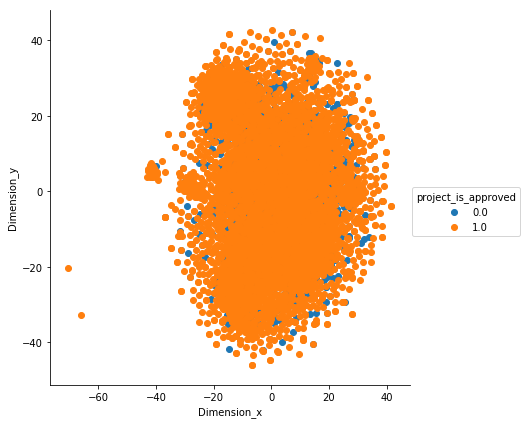

In [97]:
for_tsne = np.hstack((X_embedding, Y))
for_tsne_df = pd.DataFrame( data = for_tsne, columns=['Dimension_x','Dimension_y','project_is_approved'])

#ploting the result of tsne
sns.FacetGrid(for_tsne_df, hue="project_is_approved", size=6).map(mp.scatter, "Dimension_x","Dimension_y").add_legend()
mp.show()

The clusters are overlapping so we can not draw any conclusions

<h2> 2.2 TSNE with `TFIDF` encoding of 'project_title' + 'essay ' feature </h2>

(5000, 1)
Shape of X_embedding (5000, 2)


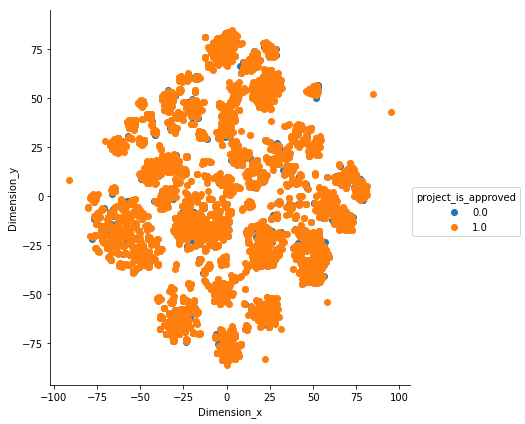

In [98]:
from sklearn.manifold import TSNE

x = X2
y = project['project_is_approved'][:5000]
y= y.values.reshape(-1,1)
print(y.shape)

# Reshaping:- https://stackoverflow.com/questions/53723928/attributeerror-series-object-has-no-attribute-reshape

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

X_embedding = tsne.fit_transform(x.toarray())
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix
print('Shape of X_embedding',X_embedding.shape)

for_tsne = np.hstack((X_embedding, Y))
for_tsne_df = pd.DataFrame( data = for_tsne, columns=['Dimension_x','Dimension_y','project_is_approved'])

#ploting the result of tsne
sns.FacetGrid(for_tsne_df, hue="project_is_approved", size=6).map(mp.scatter, "Dimension_x","Dimension_y").add_legend()
mp.show()


We cannot draw any conclusions as both are clusters are overlapping. Clearly approved points dominate, both approved and not-approved points are spread over the plot.

<h2> 2.3 TSNE with `Avg W2V` encoding of 'project_title' + 'essay ' feature </h2>

(5000, 1)
Shape of X_embedding (5000, 2)


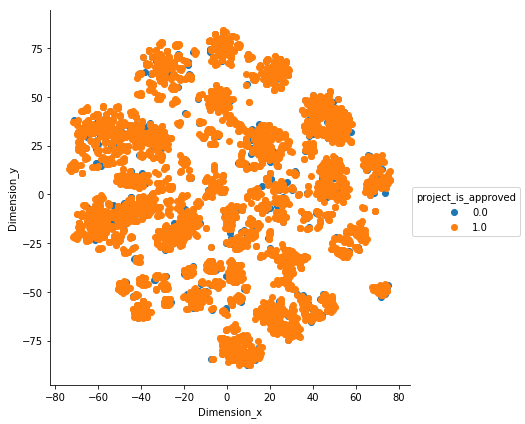

In [99]:
from sklearn.manifold import TSNE

x = X3
y = project['project_is_approved'][:5000]
y= y.values.reshape(-1,1)
print(y.shape)

# Reshaping:- https://stackoverflow.com/questions/53723928/attributeerror-series-object-has-no-attribute-reshape

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

X_embedding = tsne.fit_transform(x.toarray())
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix
print('Shape of X_embedding',X_embedding.shape)

for_tsne = np.hstack((X_embedding, Y))
for_tsne_df = pd.DataFrame( data = for_tsne, columns=['Dimension_x','Dimension_y','project_is_approved'])

#ploting the result of tsne
sns.FacetGrid(for_tsne_df, hue="project_is_approved", size=6).map(mp.scatter, "Dimension_x","Dimension_y").add_legend()
mp.show()


Cannot draw any conclusions from the avg w2v plot.

<h2> 2.4 TSNE with `TFIDF W2V` encoding of 'project_title' + 'essay ' feature </h2>

(5000, 1)
Shape of X_embedding (5000, 2)


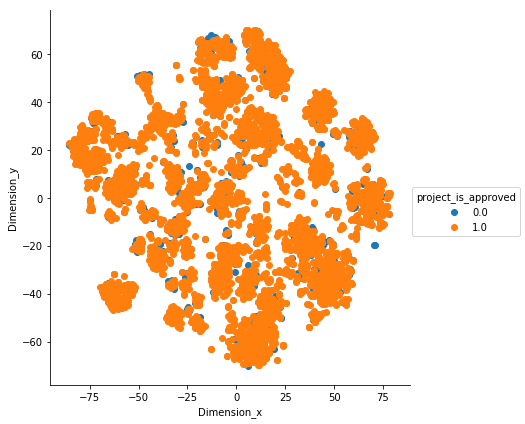

In [100]:
from sklearn.manifold import TSNE

x = X4
y = project['project_is_approved'][:5000]
y= y.values.reshape(-1,1)
print(y.shape)

# Reshaping:- https://stackoverflow.com/questions/53723928/attributeerror-series-object-has-no-attribute-reshape

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

X_embedding = tsne.fit_transform(x.toarray())
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix
print('Shape of X_embedding',X_embedding.shape)

for_tsne = np.hstack((X_embedding, Y))
for_tsne_df = pd.DataFrame( data = for_tsne, columns=['Dimension_x','Dimension_y','project_is_approved'])

#ploting the result of tsne
sns.FacetGrid(for_tsne_df, hue="project_is_approved", size=6).map(mp.scatter, "Dimension_x","Dimension_y").add_legend()
mp.show()


Points are not well clustered and approved and non-approved points overlap, due to which we cannot draw any conclusions.